## Análise Exploratória de Dados 
#### Dados FFO - Fábrica de Farinha e Óleo

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configurando sistema multithreading -> para execução assíncrona de callables
from concurrent.futures import ThreadPoolExecutor

In [53]:
#ÍNDICES ÓLEO - TABELAS
acidez_oleo = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "ACIDEZ ÓL")
umidade_oleo = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "UMIDADE ÓL")
peroxido_oleo = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "PERÓXIDO ÓL")
impureza_oleo = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "IMPUREZA ÓL")

#ÍNDICES ÓLEO - TOTAIS
acidez_oleo_total = acidez_oleo.tail(1)
umidade_oleo_total = umidade_oleo.tail(1)
peroxido_oleo_total = peroxido_oleo.tail(1)
impureza_oleo_total = impureza_oleo.tail(1)

#ÍNDICES FP - TABELAS 
acidez_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "ACIDEZ FP")
calcio_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "CÁLCIO FP")
fosforo_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "FÓSFORO FP")
gordura_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "GORDURA FP")
umidade_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "UMIDADE FP")
proteina_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "PROTEÍNA FP")
granu_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "GRANU FP")
mineral_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "MINERAL FP")
peroxido_fp = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "PERÓXIDO FP")

#ÍNDICES FP - TOTAIS 
acidez_fp_total = acidez_fp.tail(1)
calcio_fp_total = calcio_fp.tail(1)
fosforo_fp_total = fosforo_fp.tail(1)
gordura_fp_total = gordura_fp.tail(1)
umidade_fp_total = umidade_fp.tail(1)
proteina_fp_total = proteina_fp.tail(1)
granu_fp_total = granu_fp.tail(1)
mineral_fp_total = mineral_fp.tail(1)
peroxido_fp_total = peroxido_fp.tail(1)

#ACIDEZ FV - TABELAS
acidez_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "ACIDEZ FV")
calcio_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "CÁLCIO FV")
fosforo_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "FÓSFORO FV")
gordura_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "GORDURA FV")
umidade_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "UMIDADE FV")
proteina_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "PROTEÍNA FV")
granu_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "GRANU FV")
mineral_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "MINERAL FV")
peroxido_fv = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "PERÓXIDO FV")

#ÍNDICES FV - TOTAIS (OBSERVAÇÃO: _total gerado com a média)
acidez_fv_total = acidez_fv.tail(1)
calcio_fv_total = calcio_fv.tail(1)
fosforo_fv_total = fosforo_fv.tail(1)
gordura_fv_total = gordura_fv.tail(1)
umidade_fv_total = umidade_fv.tail(1)
proteina_fv_total = proteina_fv.tail(1)
granu_fv_total = granu_fv.tail(1)
mineral_fv_total = mineral_fv.tail(1)
peroxido_fv_total = peroxido_fv.tail(1)

#BD-FQ
analise_detalhada = pd.read_excel("Análises FFO (2).xlsx", sheet_name = "BD-FQ")

### Tratamento Inicial

In [ ]:
#Não inclui análise detalhada - BD-FQ
TABLES = {
    "acidez_oleo": acidez_oleo,
    "umidade_oleo": umidade_oleo,
    "peroxido_oleo": peroxido_oleo,
    "impureza_oleo": impureza_oleo,
    "acidez_fp": acidez_fp,
    "calcio_fp": calcio_fp,
    "fosforo_fp": fosforo_fp,
    "gordura_fp": gordura_fp,
    "umidade_fp": umidade_fp,
    "proteina_fp": proteina_fp,
    "granu_fp": granu_fp,
    "mineral_fp": mineral_fp,
    "peroxido_fp": peroxido_fp,
    "acidez_fv": acidez_fv,
    "calcio_fv": calcio_fv,
    "fosforo_fv": fosforo_fv,
    "gordura_fv": gordura_fv,
    "umidade_fv": umidade_fv,
    "proteina_fv": proteina_fv,
    "granu_fv": granu_fv,
    "mineral_fv": mineral_fv,
    "peroxido_fv": peroxido_fv
}

TABLES_TOTAL = {
    "acidez_oleo_total": acidez_oleo_total,
    "umidade_oleo_total": umidade_oleo_total,
    "peroxido_oleo_total": peroxido_oleo_total,
    "impureza_oleo_total": impureza_oleo_total,
    
    "acidez_fp_total": acidez_fp_total,
    "calcio_fp_total": calcio_fp_total,
    "fosforo_fp_total": fosforo_fp_total,
    "gordura_fp_total": gordura_fp_total,
    "umidade_fp_total": umidade_fp_total,
    "proteina_fp_total": proteina_fp_total,
    "granu_fp_total": granu_fp_total,
    "mineral_fp_total": mineral_fp_total,
    "peroxido_fp_total": peroxido_fp_total,
    
    "acidez_fv_total": acidez_fv_total,
    "calcio_fv_total": calcio_fv_total,
    "fosforo_fv_total": fosforo_fv_total,
    "gordura_fv_total": gordura_fv_total,
    "umidade_fv_total": umidade_fv_total,
    "proteina_fv_total": proteina_fv_total,
    "granu_fv_total": granu_fv_total,
    "mineral_fv_total": mineral_fv_total,
    "peroxido_fv_total": peroxido_fv_total
}

In [ ]:
def leitura_tratamento_inicial(name, df):
    if hasattr(df, "replace"): #Evitando erro do replace
        df.replace(np.nan, 0, inplace=True)
        df.drop(columns=["Unnamed: 0"], inplace=True)
        df = df.iloc[:31]
    
        df.loc[:, "Setembro"] = df.iloc[0]["Setembro"]

    return name, df

# Executa o tratamento em paralelo -> ideal para muitos datarames
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(lambda item: leitura_tratamento_inicial(*item), TABLES.items()))

# Mostra cada tabela individualmente
for name, df in resultados:
    print(f"\n=== {name.upper()} ===")
    display(df)


=== ACIDEZ_OLEO ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,2.02,2.08,2.02,2.08,0.00,2.26,3.79,4.06
1,1.97,0.00,0.00,1.95,0.00,1.95,1.73,0.00,4.06
2,2.01,2.08,2.01,2.08,0.00,2.08,2.16,0.00,4.06
3,2.03,1.91,2.03,1.91,0.00,1.91,2.15,2.87,4.06
4,0.00,2.05,2.06,0.00,2.06,2.05,1.74,1.84,4.06
5,2.00,1.93,2.00,0.00,2.00,1.93,0.00,2.43,4.06
6,1.95,2.00,1.95,0.00,1.95,2.00,2.45,1.24,4.06
7,1.91,2.07,1.91,0.00,1.91,0.00,2.06,1.49,4.06
8,2.07,0.00,0.00,1.97,2.07,1.97,2.06,0.00,4.06
9,2.02,2.10,2.02,2.10,2.02,2.10,2.10,0.00,4.06



=== UMIDADE_OLEO ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,0.07,0.09,0.07,0.09,0.00,0.45,0.16,0.2
1,0.06,0.00,0.00,0.08,0.00,0.08,0.45,0.00,0.2
2,0.08,0.09,0.08,0.09,0.00,0.09,0.19,0.00,0.2
3,0.07,0.06,0.07,0.06,0.00,0.06,0.42,0.20,0.2
4,0.00,0.10,0.09,0.00,0.09,0.10,0.19,0.20,0.2
5,0.08,0.05,0.08,0.00,0.08,0.05,0.00,0.20,0.2
6,0.06,0.08,0.06,0.00,0.06,0.08,0.19,0.20,0.2
7,0.05,0.09,0.05,0.00,0.05,0.00,0.45,0.20,0.2
8,0.10,0.00,0.00,0.07,0.10,0.07,0.37,0.00,0.2
9,0.07,0.06,0.07,0.06,0.07,0.06,0.01,0.00,0.2



=== PEROXIDO_OLEO ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



=== IMPUREZA_OLEO ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.0,0.2,0.2,0.2,0.2,0.0,0.3,0.3,0.0
1,0.3,0.0,0.0,0.3,0.0,0.3,0.3,0.0,0.0
2,0.2,0.2,0.2,0.2,0.0,0.2,0.3,0.0,0.0
3,0.3,0.3,0.3,0.3,0.0,0.3,0.3,0.2,0.0
4,0.0,0.2,0.2,0.0,0.2,0.2,0.3,0.2,0.0
5,0.3,0.3,0.3,0.0,0.3,0.3,0.0,0.2,0.0
6,0.3,0.2,0.3,0.0,0.3,0.2,0.3,0.2,0.0
7,0.2,0.3,0.2,0.0,0.2,0.0,0.3,0.1,0.0
8,0.3,0.0,0.0,0.2,0.3,0.2,0.3,0.0,0.0
9,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.0,0.0



=== ACIDEZ_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,1.07,1.11,1.07,1.11,0.00,1.03,1.06,0.96
1,1.04,0.00,0.00,1.02,0.00,1.02,0.98,0.95,0.96
2,1.09,1.10,1.09,1.10,0.00,1.10,1.02,0.00,0.96
3,1.01,1.05,1.01,1.05,0.00,1.05,0.76,0.95,0.96
4,0.00,1.08,1.07,0.00,1.07,1.08,0.00,0.62,0.96
5,1.13,1.03,1.13,0.00,1.13,1.03,0.00,0.59,0.96
6,1.08,1.12,1.08,0.00,1.08,1.12,0.98,0.80,0.96
7,1.02,1.06,1.02,0.00,1.02,0.00,1.02,0.80,0.96
8,1.14,0.00,0.00,1.09,1.14,1.09,1.05,0.00,0.96
9,1.06,1.04,1.06,1.04,1.06,1.04,0.98,0.00,0.96



=== CALCIO_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,0.55,0.68,0.55,0.68,0.00,0.48,0.53,0.26
1,0.59,0.00,0.00,0.48,0.00,0.48,0.63,0.49,0.26
2,0.51,0.62,0.51,0.62,0.00,0.62,0.68,0.00,0.26
3,0.63,0.57,0.63,0.57,0.00,0.57,0.45,0.49,0.26
4,0.00,0.51,0.55,0.00,0.55,0.51,0.00,0.48,0.26
5,0.66,0.59,0.66,0.00,0.66,0.59,0.00,0.49,0.26
6,0.50,0.63,0.50,0.00,0.50,0.63,0.39,0.53,0.26
7,0.61,0.50,0.61,0.00,0.61,0.00,0.63,0.33,0.26
8,0.53,0.00,0.00,0.47,0.53,0.47,0.50,0.00,0.26
9,0.67,0.53,0.67,0.53,0.67,0.53,0.51,0.00,0.26



=== FOSFORO_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,0.35,0.49,0.35,0.49,0.00,0.40,0.39,0.26
1,0.44,0.00,0.00,0.42,0.00,0.42,0.49,0.38,0.26
2,0.34,0.37,0.34,0.37,0.00,0.37,0.51,0.00,0.26
3,0.46,0.44,0.46,0.44,0.00,0.44,0.39,0.38,0.26
4,0.00,0.31,0.42,0.00,0.42,0.31,0.00,0.34,0.26
5,0.39,0.46,0.39,0.00,0.39,0.46,0.00,0.37,0.26
6,0.47,0.39,0.47,0.00,0.47,0.39,0.36,0.34,0.26
7,0.35,0.34,0.35,0.00,0.35,0.00,0.47,0.28,0.26
8,0.48,0.00,0.00,0.41,0.48,0.41,0.40,0.00,0.26
9,0.41,0.36,0.41,0.36,0.41,0.36,0.39,0.00,0.26



=== GORDURA_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,5.85,5.65,5.85,5.65,0.00,4.74,4.47,4.06
1,5.83,0.00,0.00,5.60,0.00,5.60,5.51,4.54,4.06
2,5.74,5.95,5.74,5.95,0.00,5.95,5.96,0.00,4.06
3,5.91,5.75,5.91,5.75,0.00,5.75,4.76,4.54,4.06
4,0.00,5.90,5.79,0.00,5.79,5.90,0.00,4.96,4.06
5,5.64,5.65,5.64,0.00,5.64,5.65,0.00,5.45,4.06
6,5.58,5.80,5.58,0.00,5.58,5.80,4.50,5.50,4.06
7,5.73,5.55,5.73,0.00,5.73,0.00,5.34,3.60,4.06
8,5.92,0.00,0.00,5.70,5.92,5.70,4.81,0.00,4.06
9,5.85,5.85,5.85,5.85,5.85,5.85,6.42,0.00,4.06



=== UMIDADE_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,5.2,5.12,5.2,5.12,0.00,5.43,4.10,4.76
1,4.61,0.0,0.00,5.0,0.00,5.00,5.42,4.84,4.76
2,5.40,5.6,5.40,5.6,0.00,5.60,4.34,0.00,4.76
3,5.89,4.8,5.89,4.8,0.00,4.80,5.70,4.84,4.76
4,0.00,5.4,4.87,0.0,4.87,5.40,0.00,5.14,4.76
5,5.97,4.9,5.97,0.0,5.97,4.90,0.00,5.31,4.76
6,4.97,5.1,4.97,0.0,4.97,5.10,5.80,4.03,4.76
7,5.33,5.3,5.33,0.0,5.33,0.00,5.83,5.23,4.76
8,5.19,0.0,0.00,5.5,5.19,5.50,4.91,0.00,4.76
9,4.45,4.7,4.45,4.7,4.45,4.70,5.56,0.00,4.76



=== PROTEINA_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,84.1,83.56,84.1,83.56,0.00,85.61,87.93,86.77
1,84.63,0.0,0.00,83.5,0.00,83.50,84.21,86.38,86.77
2,84.11,84.5,84.11,84.5,0.00,84.50,85.38,0.00,86.77
3,83.89,83.8,83.89,83.8,0.00,83.80,85.55,86.38,86.77
4,0.00,84.3,83.12,0.0,83.12,84.30,0.00,86.12,86.77
5,84.78,83.7,84.78,0.0,84.78,83.70,0.00,85.56,86.77
6,83.24,84.7,83.24,0.0,83.24,84.70,86.14,86.90,86.77
7,84.17,83.9,84.17,0.0,84.17,0.00,84.18,87.42,86.77
8,83.64,0.0,0.00,84.2,83.64,84.20,86.51,0.00,86.77
9,84.09,83.6,84.09,83.6,84.09,83.60,84.45,0.00,86.77



=== GRANU_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,0.92,0.83,0.92,0.83,0.00,0.62,0.62,2.19
1,0.97,0.00,0.00,0.75,0.00,0.75,0.65,0.98,2.19
2,0.91,0.81,0.91,0.81,0.00,0.81,0.79,0.00,2.19
3,0.72,0.70,0.72,0.70,0.00,0.70,1.00,0.98,2.19
4,0.00,0.98,0.86,0.00,0.86,0.98,0.00,0.70,2.19
5,0.81,0.79,0.81,0.00,0.81,0.79,0.00,1.96,2.19
6,0.95,0.85,0.95,0.00,0.95,0.85,0.62,1.69,2.19
7,0.78,0.73,0.78,0.00,0.78,0.00,0.58,1.75,2.19
8,0.88,0.00,0.00,0.77,0.88,0.77,0.69,0.00,2.19
9,0.74,0.90,0.74,0.90,0.74,0.90,0.79,0.00,2.19



=== MINERAL_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,2.5,2.94,2.5,2.94,0.00,2.37,2.73,1.83
1,2.35,0.0,0.00,2.8,0.00,2.80,2.88,2.58,1.83
2,2.59,2.4,2.59,2.4,0.00,2.40,3.18,0.00,1.83
3,2.06,2.1,2.06,2.1,0.00,2.10,2.27,2.58,1.83
4,0.00,2.7,2.97,0.0,2.97,2.70,0.00,2.33,1.83
5,2.44,2.2,2.44,0.0,2.44,2.20,0.00,2.37,1.83
6,2.15,2.6,2.15,0.0,2.15,2.60,2.05,2.50,1.83
7,2.50,2.3,2.50,0.0,2.50,0.00,2.84,1.50,1.83
8,2.71,0.0,0.00,2.0,2.71,2.00,2.78,0.00,1.83
9,2.19,2.9,2.19,2.9,2.19,2.90,2.10,0.00,1.83



=== PEROXIDO_FP ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



=== ACIDEZ_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,1.01,1.12,1.01,1.12,0.00,1.12,1.21,0.88
1,1.02,0.00,0.00,1.19,0.00,1.02,1.09,0.00,0.88
2,0.90,1.12,0.90,1.12,0.00,0.90,1.16,0.00,0.88
3,1.10,1.08,1.10,1.08,0.00,1.10,1.15,1.04,0.88
4,0.00,0.95,0.91,0.00,0.91,0.91,0.00,0.72,0.88
5,0.96,0.95,0.96,0.00,0.96,0.96,0.00,0.83,0.88
6,1.00,0.92,1.00,0.00,1.00,1.00,1.09,0.79,0.88
7,0.90,1.16,0.90,0.00,0.90,0.00,1.14,0.79,0.88
8,1.10,0.00,0.00,1.08,1.10,1.10,1.13,0.00,0.88
9,1.03,1.11,1.03,1.11,1.03,1.03,2.14,0.00,0.88



=== CALCIO_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,4.89,5.16,4.89,5.16,0.00,5.25,4.09,4.95
1,5.30,0.00,0.00,4.83,0.00,5.30,5.42,0.00,4.95
2,5.20,5.27,5.20,5.27,0.00,5.20,4.07,0.00,4.95
3,4.93,5.28,4.93,5.28,0.00,4.93,4.06,4.55,4.95
4,0.00,5.20,4.96,0.00,4.96,4.96,0.00,4.08,4.95
5,5.14,4.95,5.14,0.00,5.14,5.14,0.00,4.41,4.95
6,4.98,4.85,4.98,0.00,4.98,4.98,5.16,3.26,4.95
7,5.08,5.14,5.08,0.00,5.08,0.00,5.19,4.19,4.95
8,5.00,0.00,0.00,5.02,5.00,5.00,4.37,0.00,4.95
9,5.17,4.86,5.17,4.86,5.17,5.17,3.86,0.00,4.95



=== FOSFORO_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,2.95,2.96,2.95,2.96,0.00,2.97,2.45,2.81
1,2.85,0.00,0.00,2.81,0.00,2.85,3.05,0.00,2.81
2,2.96,2.78,2.96,2.78,0.00,2.96,2.55,0.00,2.81
3,2.81,2.86,2.81,2.86,0.00,2.81,2.55,2.66,2.81
4,0.00,2.74,2.78,0.00,2.78,2.78,0.00,2.60,2.81
5,2.72,2.94,2.72,0.00,2.72,2.72,0.00,2.62,2.81
6,2.71,2.72,2.71,0.00,2.71,2.71,2.95,2.13,2.81
7,2.97,3.00,2.97,0.00,2.97,0.00,2.95,2.63,2.81
8,2.72,0.00,0.00,2.93,2.72,2.72,2.75,0.00,2.81
9,2.99,2.76,2.99,2.76,2.99,2.99,2.38,0.00,2.81



=== GORDURA_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,10.12,10.09,10.12,10.09,0.00,10.43,14.25,11.22
1,10.81,0.00,0.00,10.54,0.00,10.81,11.24,0.00,11.22
2,10.65,9.99,10.65,9.99,0.00,10.65,14.83,0.00,11.22
3,9.64,10.05,9.64,10.05,0.00,9.64,14.65,12.33,11.22
4,0.00,9.86,9.37,0.00,10.01,9.37,0.00,14.97,11.22
5,9.49,9.05,9.49,0.00,9.78,9.49,0.00,15.11,11.22
6,9.66,9.22,9.66,0.00,9.66,0.00,11.95,14.97,11.22
7,9.20,9.06,9.20,0.00,9.60,0.00,11.50,15.07,11.22
8,10.90,0.00,0.00,10.27,10.90,10.90,12.57,0.00,11.22
9,10.03,9.63,10.03,9.63,10.03,10.03,14.19,0.00,11.22



=== UMIDADE_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,5.12,4.88,5.12,4.88,0.00,5.66,2.40,5.81
1,4.29,0.00,0.00,4.97,0.00,4.29,5.03,0.00,5.81
2,5.45,5.27,5.45,5.27,0.00,5.45,4.64,0.00,5.81
3,4.12,4.99,4.12,4.99,0.00,4.12,4.68,5.00,5.81
4,0.00,4.85,4.78,0.00,4.78,4.78,0.00,4.82,5.81
5,4.61,4.14,4.61,0.00,4.61,4.61,0.00,5.74,5.81
6,4.10,4.55,4.10,0.00,4.10,4.10,4.98,2.27,5.81
7,5.06,4.40,5.06,0.00,5.06,0.00,5.02,3.29,5.81
8,5.32,0.00,0.00,4.37,5.32,5.32,4.49,0.00,5.81
9,4.58,5.46,4.58,5.46,4.58,4.58,3.90,0.00,5.81



=== PROTEINA_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,67.45,66.49,67.45,66.49,0.00,64.16,64.64,63.8
1,66.10,0.00,0.00,66.67,0.00,66.10,63.23,0.00,63.8
2,65.12,66.59,65.12,66.59,0.00,65.12,63.05,0.00,63.8
3,66.87,65.73,66.87,65.73,0.00,66.87,62.94,63.90,63.8
4,0.00,65.28,66.72,0.00,66.72,66.72,0.00,61.82,63.8
5,65.14,67.69,65.14,0.00,65.14,65.14,0.00,60.53,63.8
6,65.85,67.70,65.85,0.00,65.85,65.85,63.02,67.08,63.8
7,67.76,66.90,67.76,0.00,67.76,0.00,63.05,62.82,63.8
8,65.67,0.00,0.00,66.02,65.67,65.67,64.20,0.00,63.8
9,66.51,66.05,66.51,66.05,66.51,66.51,65.26,0.00,63.8



=== GRANU_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,2.61,2.92,2.61,2.92,0.00,2.69,2.97,3.15
1,2.84,0.00,0.00,2.71,0.00,2.84,2.68,0.00,3.15
2,2.92,2.91,2.92,2.91,0.00,2.92,3.10,0.00,3.15
3,2.99,2.93,2.99,2.93,0.00,2.99,3.00,2.34,3.15
4,0.00,2.50,2.50,0.00,2.50,2.50,0.00,1.95,3.15
5,2.95,2.76,2.95,0.00,2.95,2.95,0.00,3.22,3.15
6,2.83,2.71,2.83,0.00,2.83,2.83,2.77,2.15,3.15
7,2.50,2.61,2.50,0.00,2.50,0.00,2.87,2.21,3.15
8,2.79,0.00,0.00,2.56,2.79,2.79,3.01,0.00,3.15
9,2.72,2.67,2.72,2.67,2.72,2.72,2.89,0.00,3.15



=== MINERAL_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.00,15.24,15.76,15.24,15.76,0.00,16.80,15.23,16.05
1,15.25,0.00,0.00,15.67,0.00,15.25,17.22,0.00,16.05
2,15.79,15.76,15.79,15.76,0.00,15.79,14.91,0.00,16.05
3,15.25,15.24,15.25,15.24,0.00,15.25,14.95,14.71,16.05
4,0.00,15.73,15.28,0.00,15.28,15.28,0.00,14.97,16.05
5,15.45,15.37,15.45,0.00,15.45,15.45,0.00,15.94,16.05
6,15.33,15.63,15.33,0.00,15.33,15.33,16.86,13.49,16.05
7,15.89,15.63,15.89,0.00,15.89,0.00,17.00,15.53,16.05
8,15.49,0.00,0.00,15.54,15.49,15.49,14.76,0.00,16.05
9,15.33,15.09,15.33,15.09,15.33,15.33,14.64,0.00,16.05



=== PEROXIDO_FV ===


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
#Tratando o dados do total - não foi feita uma função para o tratamento de dados do total por se tratarem de poucas linhas (menos custoso)
#Selecionando todas as variáveis que temrminem com _total -> total dos valores por mês
variavel_termina_total = [variavel for variavel in globals() if variavel.endswith("_total")] #Identificando todos os dataframes que possuem o total

for nome, df in TABLES_TOTAL.items():
    print(f"\n=== {name.upper()} ===")
    #Tirando as colunas de Unnamed: 0 e dados de Setembro, já que contém apenas informções de um dia (não é interessante para o total)
    df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)
    display(df)


=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,2.005385,2.01,2.01,2.0035,2.008261,2.0235,3.6395,2.36



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.073846,0.072917,0.075,0.0725,0.074348,0.17,0.2915,0.1975



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.257692,0.25,0.253846,0.255,0.243478,0.265,0.315,0.2



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,1.069231,1.067917,1.062308,1.0645,1.068261,1.005909,1.001818,0.786667



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.579615,0.538333,0.575,0.544,0.590435,0.497273,0.561364,0.424762



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.408846,0.3825,0.406923,0.3925,0.415217,0.369091,0.424091,0.348095



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,5.760385,5.764583,5.765769,5.7675,5.747391,5.461818,5.455909,4.415714



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,5.204231,5.154167,5.163846,5.15,5.18913,5.461364,5.421364,5.046667



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,84.075385,84.025,84.043077,83.945,83.994783,84.824545,84.932273,86.740476



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.861923,0.815,0.842692,0.804,0.851304,0.765909,0.753636,1.195238



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,2.46,2.4,2.528462,2.335,2.500435,2.323182,2.652273,2.160952



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,1.031923,1.03125,1.013846,1.040952,1.01913,1.049545,1.49,0.952



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,5.09,5.05,5.08,5.04,5.06,5.07,4.43,4.24



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,2.863846,2.853333,2.85,2.839524,2.870435,2.856818,2.674545,2.6385



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,9.978077,9.954583,9.886154,10.128571,10.084348,10.805238,13.973636,12.9665



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,4.618846,4.830417,4.663462,4.957619,4.690435,5.072273,4.638182,4.639



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,66.202308,66.639583,66.264231,66.465714,66.27087,64.832273,62.965909,64.012



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,2.729615,2.72,2.759231,2.735714,2.73,2.691818,2.851364,2.508



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,15.529615,15.432917,15.526154,15.465714,15.54087,16.090455,15.51,15.208



=== PEROXIDO_FV ===


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1483679540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[c for c in ["Unnamed: 0", "Setembro"] if c in df.columns], inplace=True)


,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto
31,0.0,0.0,0.0,0.0,0.0,0.0,0.042727,0.0


### *Gráfico 1*: Análise Por Categoria 
#### Contemplam as seguintes categorias:
#### - *Oléo*                                     - *Índices FV*                         - *Índices FP*         


In [58]:
def gerador_histograma(*dataframe: pd.DataFrame, indices: str, intervalo_y: int, intervalo_fim_x: float):
    #Unindo todos os gráficos que se enqudram na categoria óleo, pois, nos gráficos de dispersão, apenas importa a ocorrência dos valores
    df = pd.concat(dataframe, axis=0)

    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    colunas = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro'] #Meses presentes na base 
    cores = ['#4575b4', "#36a1e3", '#abd9e9', '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026', '#762a83']

    axes=axes.flatten()

    for i, col in enumerate(colunas):
        ax = axes[i]
        sns.histplot(data=df, x=col, bins=15, kde=True, color=cores[i], ax=ax)
        ax.set_title(f'Distribuição de {col}')

        #Nomeando os eixos
        ax.set_xlabel(f"Incidência - ÍNDICES {indices}")
        ax.set_ylabel("Frequência")

        #Definindo os eixos
        ax.set_yticks(np.arange(0, int(ax.get_ylim()[1]) + 1, intervalo_y)) #Eixos dinâmicos
        ax.set_xticks(np.arange(df[col].min(), df[col].max() + 0.2, intervalo_fim_x)) #Para o eixo x, selecionando todas as ocorrências dos valores mínimos até o máximo, espaçando de 2 em dois números da grade6
        #Definindo uma linha média dos dados
        media = df[col].mean()
        ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média {media: .3f}')
        ax.legend()

    plt.tight_layout()
    plt.suptitle("Distribuições Personalizadas - Kronos - Amaparo", y=1.02)
    plt.show()

    return fig 

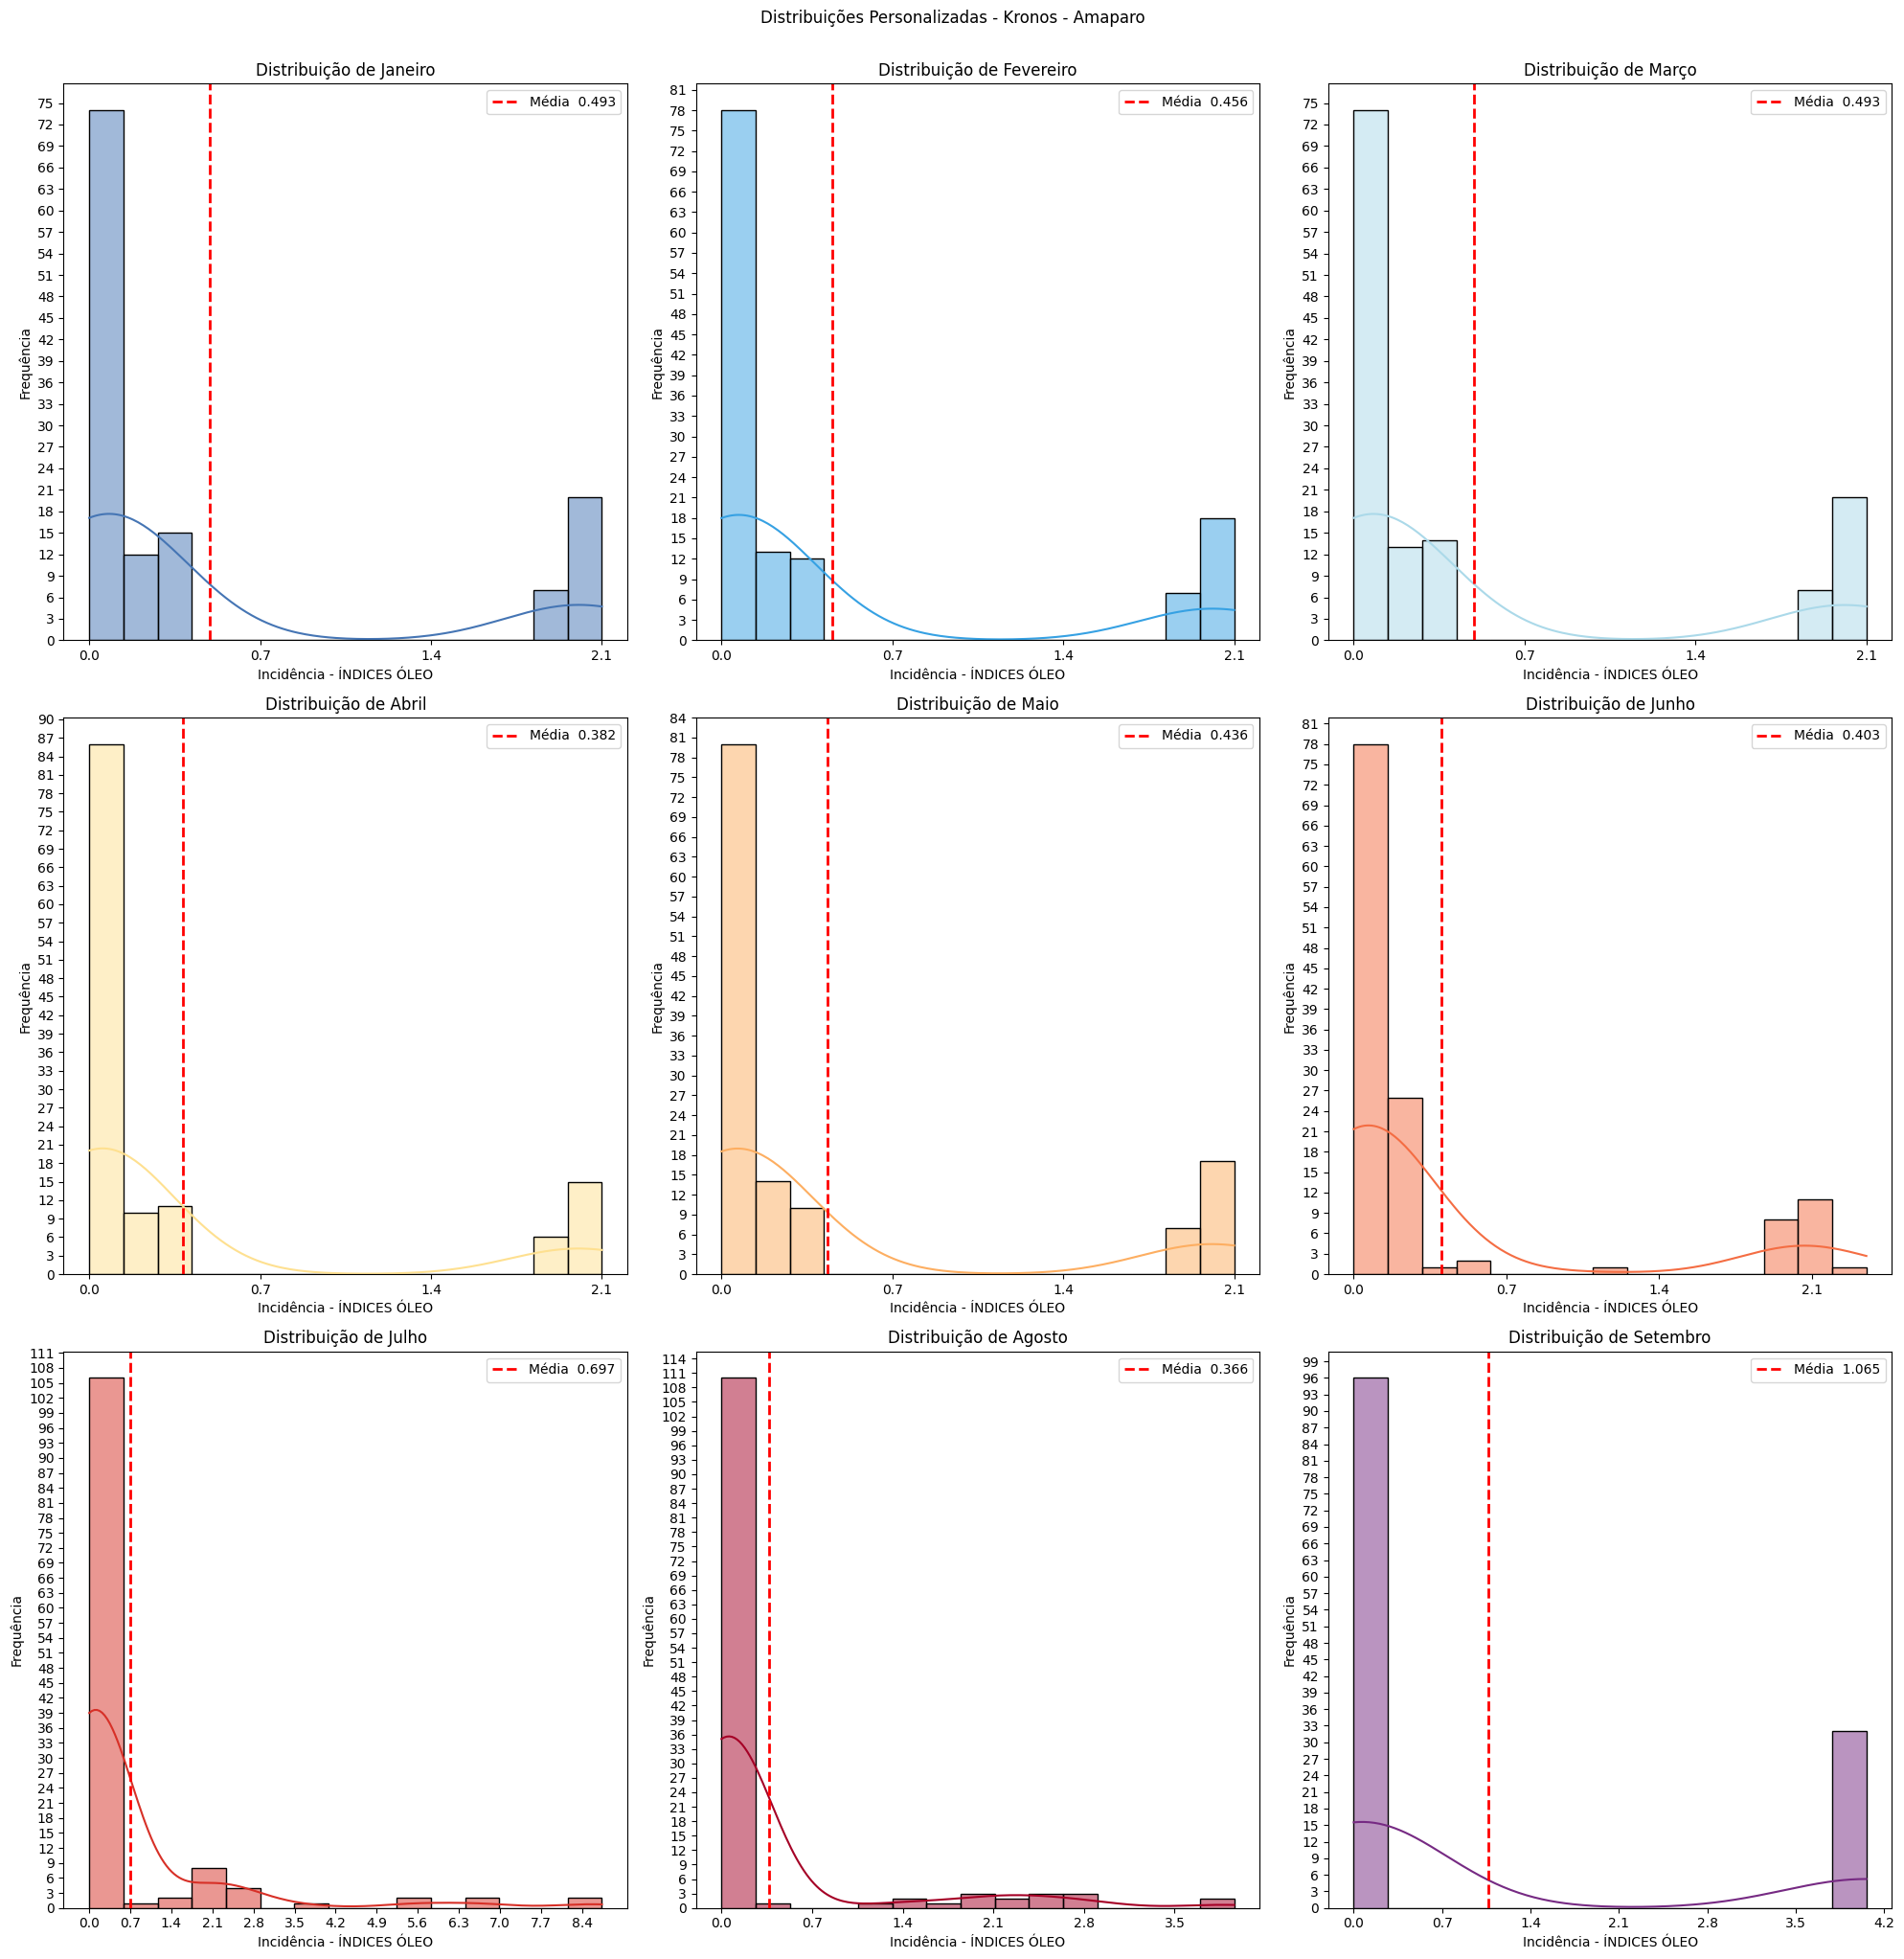

Figure(2000x2000)


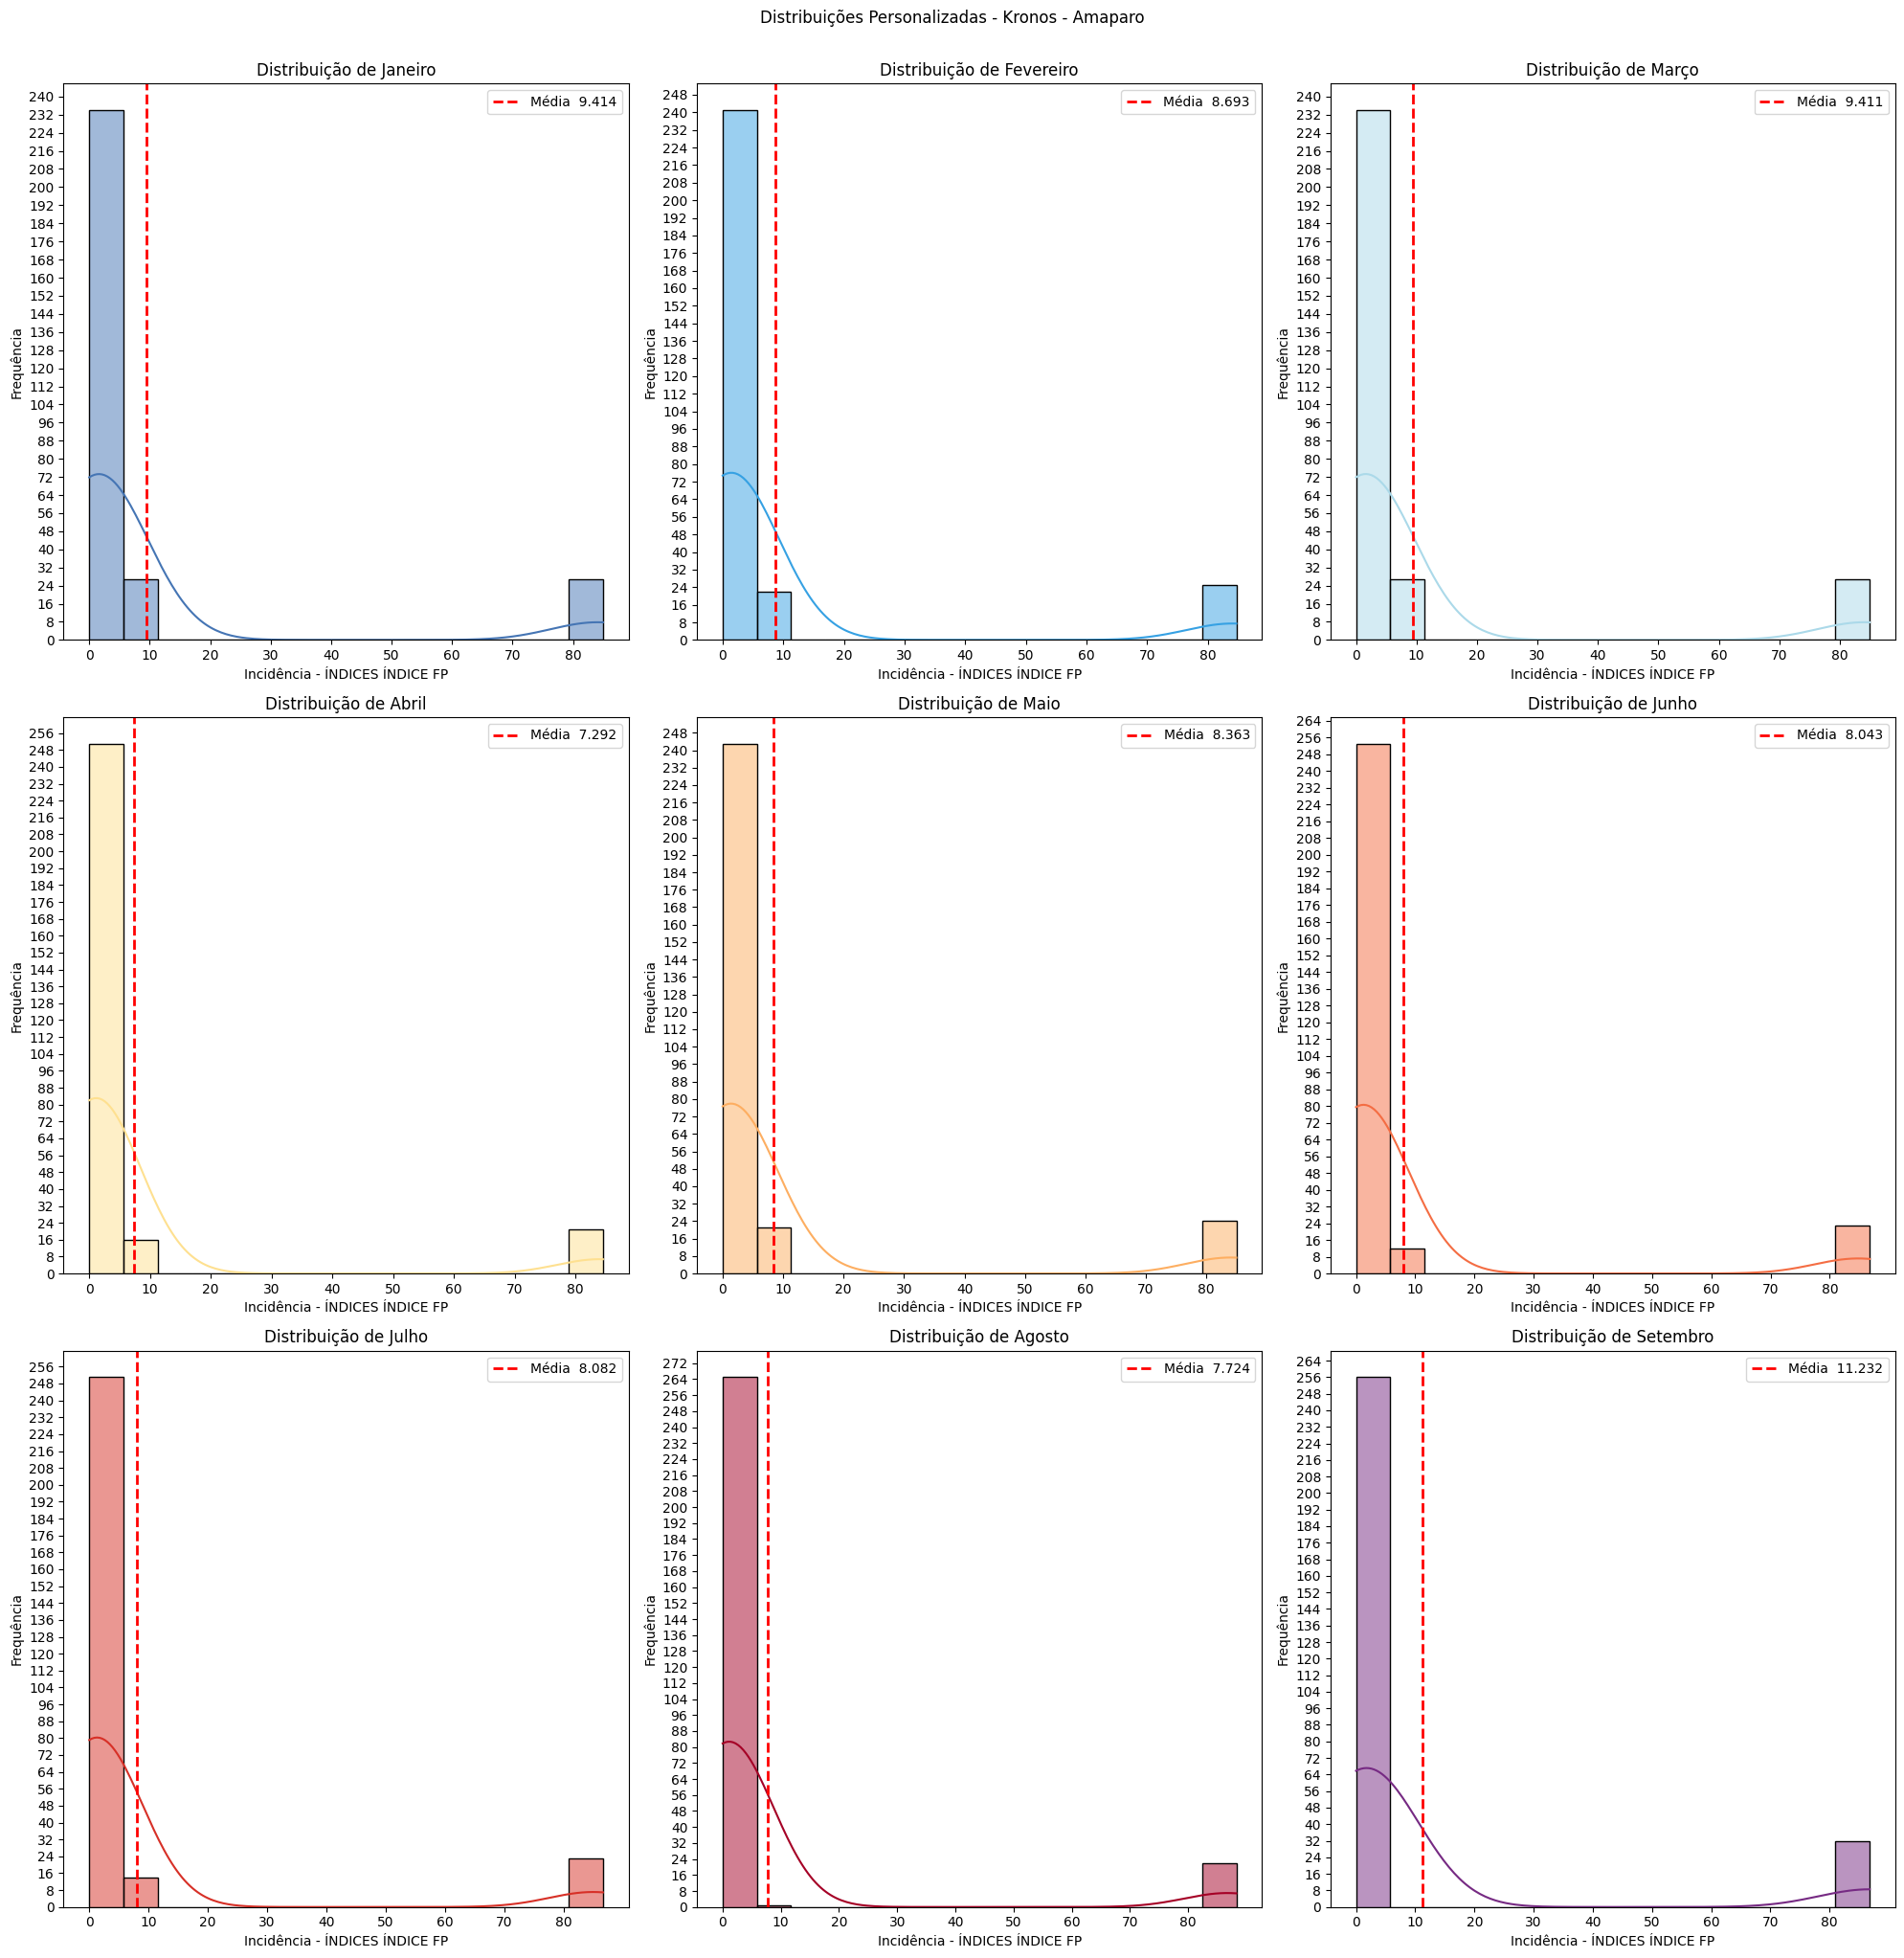

Figure(2000x2000)


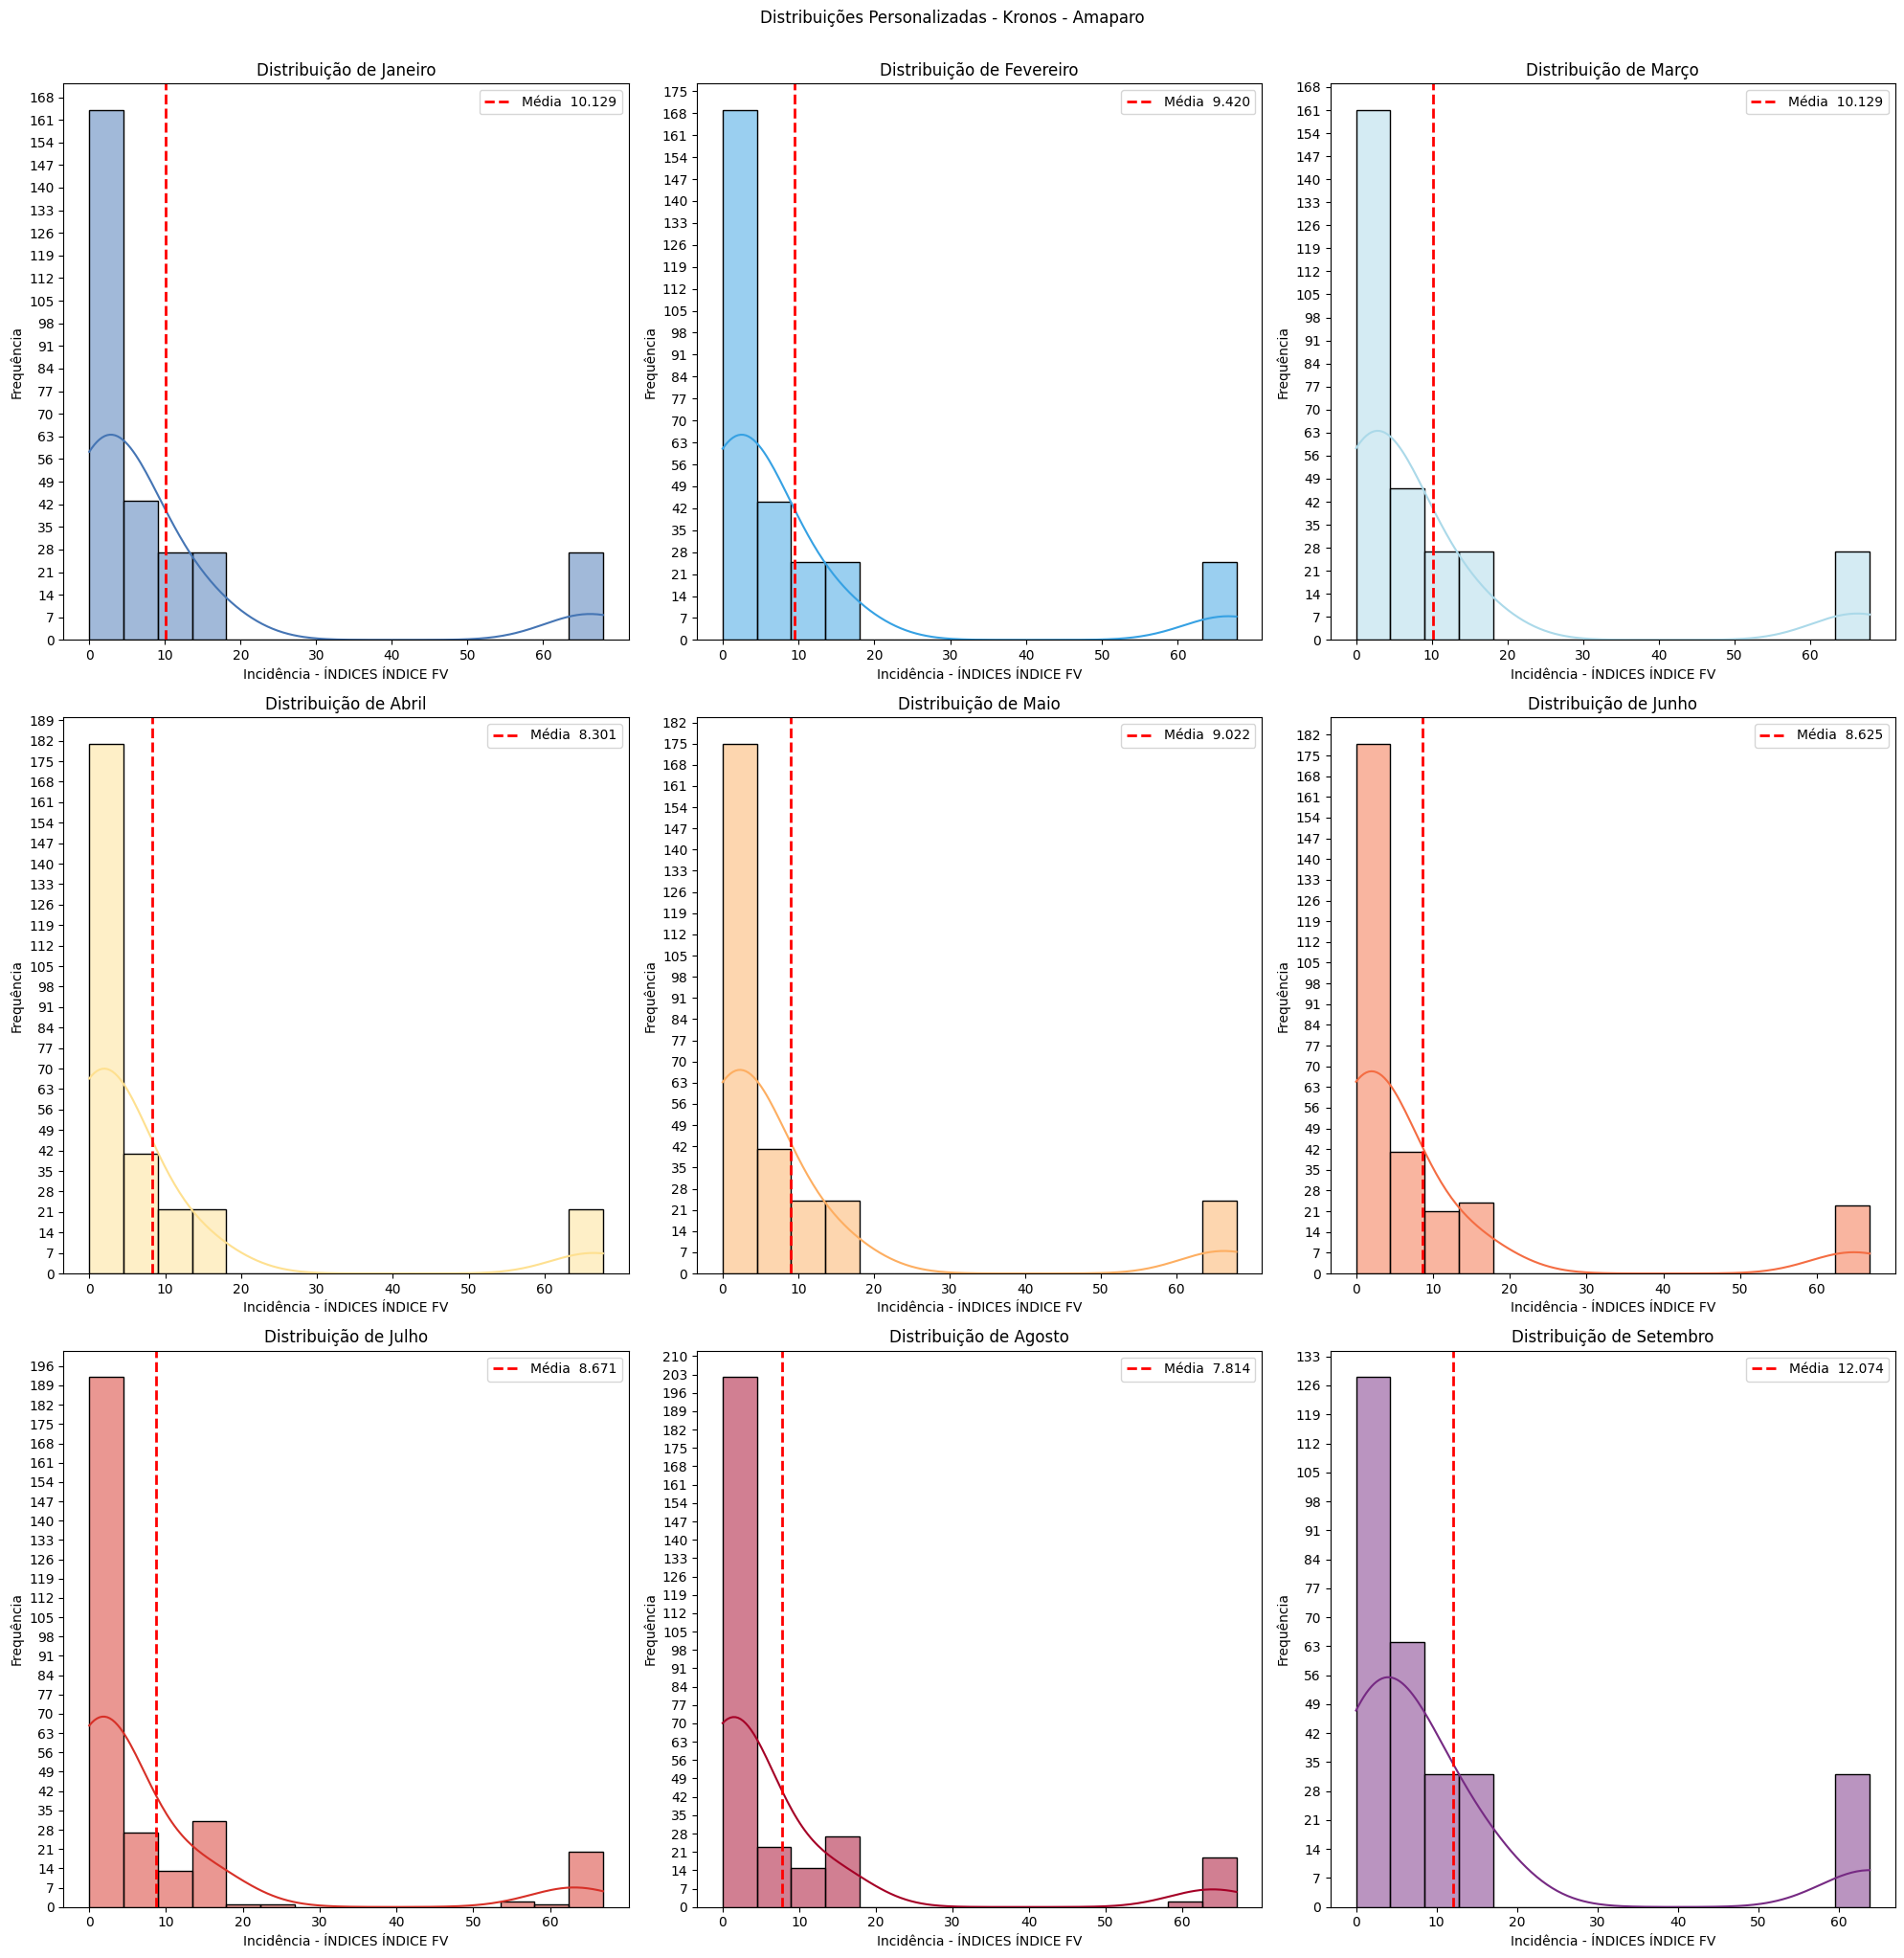

Figure(2000x2000)


In [59]:
#Gerador dos GRÁFICOS por ÍNDICE
print(gerador_histograma(acidez_oleo, umidade_oleo, peroxido_oleo, impureza_oleo, indices="ÓLEO", intervalo_y=3, intervalo_fim_x=0.7))
print(gerador_histograma(acidez_fp, calcio_fp, fosforo_fp, gordura_fp, umidade_fp, proteina_fp, granu_fp, mineral_fp, peroxido_fp, indices="ÍNDICE FP", intervalo_y=8, intervalo_fim_x=10))
print(gerador_histograma(acidez_fv, calcio_fv, fosforo_fv, gordura_fv, umidade_fv, proteina_fv, granu_fv, mineral_fv, peroxido_fv, indices="ÍNDICE FV", intervalo_y=7, intervalo_fim_x=10))

### *Gráfico 2*: Índices Totais Por Categoria
#### Contemplam as seguintes categorias:
#### - *Oléo totais*                                     - *Índices FV totais*                         - *Índices FP*         totais   

In [71]:
def gerador_boxplot(*dataframe: pd.DataFrame, indice: str):
    #Juntando dataframes
    df_list = []

    for df in dataframe:
        df_melted = df.melt(var_name='Mês', value_name='Valor') #Tratamento necessário para os dados (df) totais -> melt para trocar  tabela verticalmente
        df_list.append(df_melted)

    df_final = pd.concat(df_list, ignore_index=True)

    #Gerando boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Mês', y='Valor', data=df_final, palette='Set2')

    plt.title(f'Boxplot de {indice}', fontsize=16)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Valor', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    return plt

C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1774308765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mês', y='Valor', data=df_final, palette='Set2')


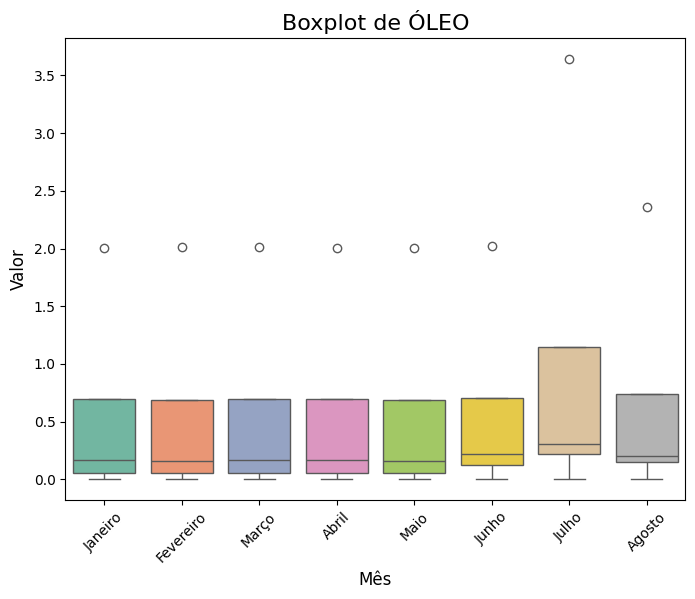

<module 'matplotlib.pyplot' from 'C:\\Users\\juliamattos-ieg\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1774308765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mês', y='Valor', data=df_final, palette='Set2')


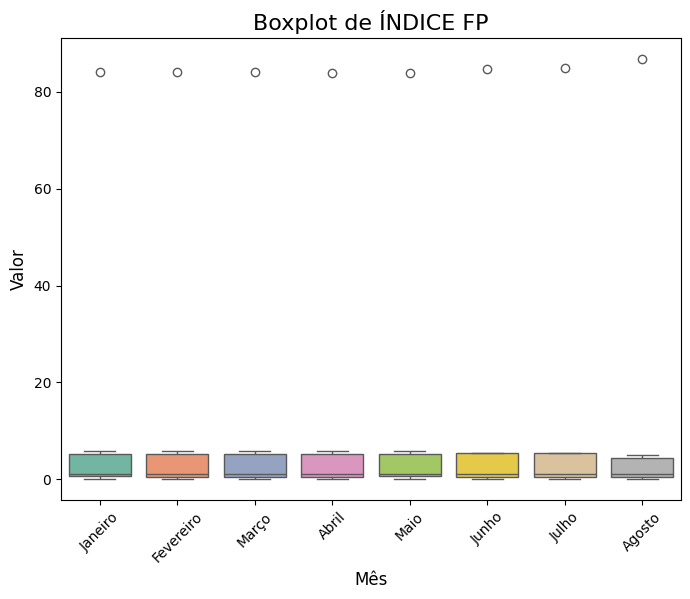

<module 'matplotlib.pyplot' from 'C:\\Users\\juliamattos-ieg\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>


C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_34416\1774308765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mês', y='Valor', data=df_final, palette='Set2')


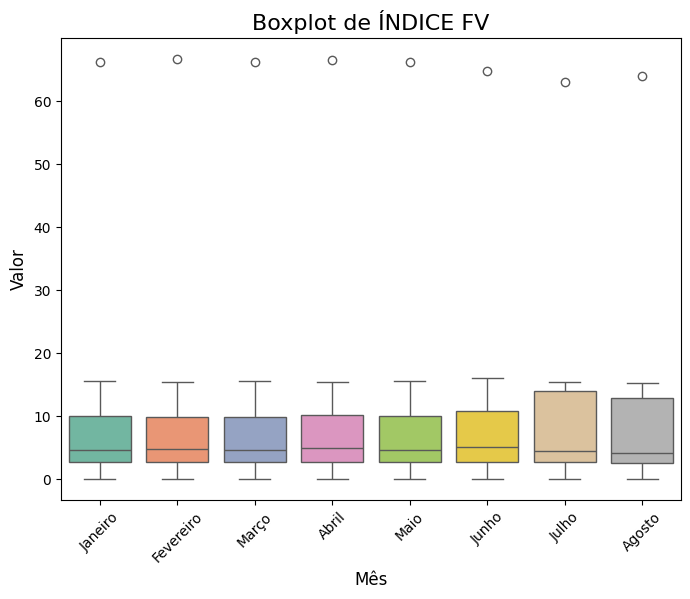

<module 'matplotlib.pyplot' from 'C:\\Users\\juliamattos-ieg\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>


In [73]:
#Gerador dos GRÁFICOS por ÍNDICE
print(gerador_boxplot(acidez_oleo_total, umidade_oleo_total, peroxido_oleo_total, impureza_oleo_total, indice="ÓLEO"))
print(gerador_boxplot(acidez_fp_total, calcio_fp_total, fosforo_fp_total, gordura_fp_total, umidade_fp_total, proteina_fp_total, granu_fp_total, mineral_fp_total, peroxido_fp_total, indice="ÍNDICE FP", ))
print(gerador_boxplot(acidez_fv_total, calcio_fv_total, fosforo_fv_total, gordura_fv_total, umidade_fv_total, proteina_fv_total, granu_fv_total, mineral_fv_total, peroxido_fv_total, indice="ÍNDICE FV", ))